# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---
## 2. Load data

In [2]:
df = pd.read_csv('clean_data_after_eda.csv')
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [3]:
df.head(3)

,Unnamed: 0,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn
0,0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,...,0.131756,0.092638,0.03691,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,...,0.147600,0.000000,0.00000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,...,0.167798,0.088409,0.00000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0


---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [4]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"], format='%Y-%m-%d')
price_df.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [5]:
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

In [6]:
monthly_price_by_id

,id,price_date,price_off_peak_var,price_off_peak_fix
0,0002203ffbb812588b632b9e628cc38d,2015-01-01,0.126098,40.565969
1,0002203ffbb812588b632b9e628cc38d,2015-02-01,0.126098,40.565969
2,0002203ffbb812588b632b9e628cc38d,2015-03-01,0.128067,40.728885
3,0002203ffbb812588b632b9e628cc38d,2015-04-01,0.128067,40.728885
4,0002203ffbb812588b632b9e628cc38d,2015-05-01,0.128067,40.728885
5,0002203ffbb812588b632b9e628cc38d,2015-06-01,0.128067,40.728885
6,0002203ffbb812588b632b9e628cc38d,2015-07-01,0.128067,40.728885
7,0002203ffbb812588b632b9e628cc38d,2015-08-01,0.119906,40.728885
8,0002203ffbb812588b632b9e628cc38d,2015-09-01,0.119906,40.728885
9,0002203ffbb812588b632b9e628cc38d,2015-10-01,0.119906,40.728885


In [7]:
monthly_price_by_id.groupby('id').last()

,price_date,price_off_peak_var,price_off_peak_fix
id,,,
0002203ffbb812588b632b9e628cc38d,2015-12-01,0.119906,40.728885
0004351ebdd665e6ee664792efc4fd13,2015-12-01,0.143943,44.444710
0010bcc39e42b3c2131ed2ce55246e3c,2015-12-01,0.201280,45.944710
0010ee3855fdea87602a5b7aba8e42de,2015-12-01,0.113068,40.728885
00114d74e963e47177db89bc70108537,2015-12-01,0.145440,44.266930
00126c87cf78d7604278f0a9adeb689e,2015-12-01,0.113068,40.728885
0013f326a839a2f6ad87a1859952d227,2015-12-01,0.121647,40.728885
00184e957277eeef733a7b563fdabd06,2015-12-01,0.145093,44.266930
001987ed9dbdab4efa274a9c7233e1f4,2015-12-01,0.118175,40.728885


In [8]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001


In [9]:
diff.head(25)

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000
3,0010ee3855fdea87602a5b7aba8e42de,-0.010018,0.162916
4,00114d74e963e47177db89bc70108537,-0.003994,-0.000001
5,00126c87cf78d7604278f0a9adeb689e,-0.012908,0.162916
6,0013f326a839a2f6ad87a1859952d227,-0.006171,0.000000
7,00184e957277eeef733a7b563fdabd06,-0.004111,-0.000001
8,001987ed9dbdab4efa274a9c7233e1f4,-0.007801,0.162916
9,0019baf3ed1242cd99b3cb592030446f,0.118869,14.939999


In [10]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [11]:
df.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
id,24011ae4ebbe3035111d65fa7c15bc57,d29c2c54acc38ff3c0614d0a653813dd,764c75f661154dac3a6c254cd082ea7d,bba03439a292a1e166f80264c16191cb,149d57cf92fc41cf94415803a877cb4b,1aa498825382410b098937d65c4ec26d,7ab4bf4878d8f7661dfc20e9b8e18011,01495c955be7ec5e7f3203406785aae0,f53a254b1115634330c12c7fdbf7958a,10c1b2f97a2d2a6f10299dc213d1a370,d5e512dbc8118a830a7b8c7f61d89992,6ee77a019251bcc304c88167e0dfcb4c,2c05848e1a577dd041ea6804bbf5bbf5,21860c2ff2d5df75503b230ce629c253,c5037389dd8be351d3c40f2973da2391,e4773b60d2e68aac94795782abfc006b,bd14bbac3aca710ee5288fcd8511d4bb,4e4a34a6d91ff25d0fdf68733907ad44,f2b93783adecf0d0d8d60ab547bda3de,47e976c5d7f1ee1fee6d60ca39fd0218
channel_sales,foosdfpfkusacimwkcsosbicdxkicaua,MISSING,foosdfpfkusacimwkcsosbicdxkicaua,lmkebamcaaclubfxadlmueccxoimlema,MISSING,usilxuppasemubllopkaafesmlibmsdf,foosdfpfkusacimwkcsosbicdxkicaua,foosdfpfkusacimwkcsosbicdxkicaua,usilxuppasemubllopkaafesmlibmsdf,lmkebamcaaclubfxadlmueccxoimlema,usilxuppasemubllopkaafesmlibmsdf,foosdfpfkusacimwkcsosbicdxkicaua,foosdfpfkusacimwkcsosbicdxkicaua,foosdfpfkusacimwkcsosbicdxkicaua,MISSING,lmkebamcaaclubfxadlmueccxoimlema,MISSING,foosdfpfkusacimwkcsosbicdxkicaua,MISSING,foosdfpfkusacimwkcsosbicdxkicaua
cons_12m,0,4660,544,1584,4425,8302,45097,29552,2962,26064,10831,4442,46121,7726,9707,47019,786536,30776,24838,15411
cons_gas_12m,54946,0,0,0,0,0,0,0,0,0,0,0,1542867,0,0,0,80583,0,0,0
cons_last_month,0,0,0,0,526,1998,0,1260,0,2188,3112,2489,5280,0,0,3161,85883,0,2877,0
date_activ,2013-06-15 00:00:00,2009-08-21 00:00:00,2010-04-16 00:00:00,2010-03-30 00:00:00,2010-01-13 00:00:00,2011-12-09 00:00:00,2011-12-02 00:00:00,2010-04-21 00:00:00,2011-09-23 00:00:00,2010-05-04 00:00:00,2011-07-11 00:00:00,2009-11-26 00:00:00,2011-09-01 00:00:00,2013-01-22 00:00:00,2010-12-01 00:00:00,2012-04-20 00:00:00,2010-02-15 00:00:00,2011-08-01 00:00:00,2011-05-27 00:00:00,2012-05-28 00:00:00
date_end,2016-06-15 00:00:00,2016-08-30 00:00:00,2016-04-16 00:00:00,2016-03-30 00:00:00,2016-03-07 00:00:00,2016-12-09 00:00:00,2016-12-02 00:00:00,2016-04-21 00:00:00,2016-09-23 00:00:00,2016-05-04 00:00:00,2016-07-11 00:00:00,2016-11-26 00:00:00,2016-10-30 00:00:00,2017-01-22 00:00:00,2016-12-01 00:00:00,2016-04-20 00:00:00,2016-02-15 00:00:00,2016-07-25 00:00:00,2016-05-27 00:00:00,2016-05-28 00:00:00
date_modif_prod,2015-11-01 00:00:00,2009-08-21 00:00:00,2010-04-16 00:00:00,2010-03-30 00:00:00,2010-01-13 00:00:00,2015-11-01 00:00:00,2011-12-02 00:00:00,2010-04-21 00:00:00,2011-09-23 00:00:00,2015-04-29 00:00:00,2011-07-11 00:00:00,2009-11-26 00:00:00,2013-10-30 00:00:00,2015-11-18 00:00:00,2010-12-01 00:00:00,2012-04-20 00:00:00,2010-02-15 00:00:00,2014-07-25 00:00:00,2011-05-27 00:00:00,2012-05-28 00:00:00
date_renewal,2015-06-23 00:00:00,2015-08-31 00:00:00,2015-04-17 00:00:00,2015-03-31 00:00:00,2015-03-09 00:00:00,2015-12-10 00:00:00,2015-12-03 00:00:00,2015-04-22 00:00:00,2015-09-25 00:00:00,2015-05-05 00:00:00,2015-07-12 00:00:00,2015-11-27 00:00:00,2015-11-01 00:00:00,2016-01-24 00:00:00,2015-12-02 00:00:00,2015-04-21 00:00:00,2015-02-16 00:00:00,2015-07-27 00:00:00,2015-05-31 00:00:00,2015-05-31 00:00:00
forecast_cons_12m,0,189.95,47.96,240.04,445.75,796.94,8069.28,864.73,444.38,2738.1,1204.58,561.96,4502.43,914.1,1028.52,1687.29,13517.5,3045.16,1088.35,194.42


### check out:
1. imp_cons: current paid consumption
2.  feature engineering: cons_12m and cons_last_month: check the average eletricty used and check the percentage increase or decrease
3. drop channel sales, not too much details on it if does
4. check if origin up variables affect churn greatly
5. drop either margin_gross_pow_ele or margin_net_pow_ele

## Feature Engineering.

In [12]:
average_monthly_cons = df['cons_12m']/12
df['change_in_average_cons_elec'] = ((df['cons_last_month']-average_monthly_cons)/average_monthly_cons)*100
df['change_in_average_cons_elec'].fillna(0,inplace=True)

In [13]:
df.head(15)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn,change_in_average_cons_elec
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.092638,0.036910,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1,0.000000
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0,-100.000000
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0,-100.000000
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0,-100.000000
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0,42.644068
5,1aa498825382410b098937d65c4ec26d,usilxuppasemubllopkaafesmlibmsdf,8302,0,1998,2011-12-09,2016-12-09,2015-11-01,2015-12-10,796.94,...,0.084587,0.000000,44.266930,0.000000,0.000000,44.430589,0.084587,0.000000,1,188.797880
6,7ab4bf4878d8f7661dfc20e9b8e18011,foosdfpfkusacimwkcsosbicdxkicaua,45097,0,0,2011-12-02,2016-12-02,2011-12-02,2015-12-03,8069.28,...,0.084305,0.000000,44.266930,0.000000,0.000000,44.430291,0.084305,0.000000,1,-100.000000
7,01495c955be7ec5e7f3203406785aae0,foosdfpfkusacimwkcsosbicdxkicaua,29552,0,1260,2010-04-21,2016-04-21,2010-04-21,2015-04-22,864.73,...,0.100491,0.074516,40.728885,24.437330,16.291555,40.847060,24.537821,16.366071,0,-48.835950
8,f53a254b1115634330c12c7fdbf7958a,usilxuppasemubllopkaafesmlibmsdf,2962,0,0,2011-09-23,2016-09-23,2011-09-23,2015-09-25,444.38,...,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0,-100.000000
9,10c1b2f97a2d2a6f10299dc213d1a370,lmkebamcaaclubfxadlmueccxoimlema,26064,0,2188,2010-05-04,2016-05-04,2015-04-29,2015-05-05,2738.10,...,0.101071,0.075096,40.728885,24.437330,16.291555,40.847640,24.538401,16.366651,0,0.736648


In [14]:
#dropping 'margin_gross_pow_ele' since both "margin_gross_pow_ele" and "margin_net_pow_ele" are telling the same info
df.drop(['margin_gross_pow_ele'],axis=1,inplace=True)

In [15]:
import seaborn as sns

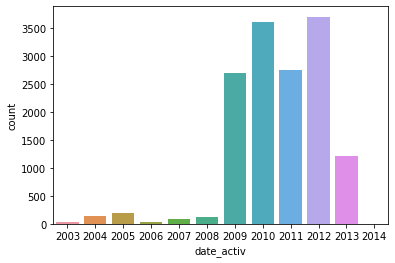

In [16]:
sns.countplot(df['date_activ'].apply(lambda x: x.year))

C:\Users\kolade\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


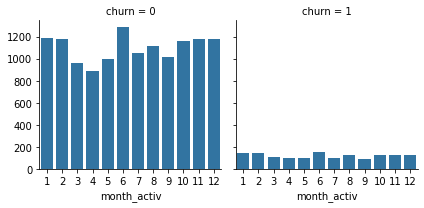

In [17]:
k = df.copy()
k['month_activ'] = k['date_activ'].apply(lambda x: x.month)
g = sns.FacetGrid(k, col='churn')
g.map(sns.countplot,'month_activ')

In [18]:
k['date_end'].apply(lambda x: x.year).value_counts()

2016    13663
2017      942
Name: date_end, dtype: int64

In [19]:
#feature engineering, extracting the years from date_activ, date_modif_prod, date_renewal
df['date_activ'] = df['date_activ'].apply(lambda x: x.year)
df['date_modif_prod'] = df['date_modif_prod'].apply(lambda x: x.year)
df['date_renewal'] = df['date_renewal'].apply(lambda x:x.year)

In [20]:
# for date 'date_end' i will be extracting only the months because 'date_end' contains only years 2016 and 2017
def createListofTotalMonths(df, month):
    month_map = {1:13,2:14,3:15,4:16,5:17,6:18,7:19,8:20,9:21,10:22,11:23,12:24}
    df = df.copy()
    df[month] = np.where(df[month].apply(lambda x:x.year)==2017, df[month].apply(lambda x: x.month).map(month_map), df[month].apply(lambda x: x.month))
    return df

In [21]:
df = createListofTotalMonths(df,'date_end')

In [22]:
df.head().T

,0,1,2,3,4
id,24011ae4ebbe3035111d65fa7c15bc57,d29c2c54acc38ff3c0614d0a653813dd,764c75f661154dac3a6c254cd082ea7d,bba03439a292a1e166f80264c16191cb,149d57cf92fc41cf94415803a877cb4b
channel_sales,foosdfpfkusacimwkcsosbicdxkicaua,MISSING,foosdfpfkusacimwkcsosbicdxkicaua,lmkebamcaaclubfxadlmueccxoimlema,MISSING
cons_12m,0,4660,544,1584,4425
cons_gas_12m,54946,0,0,0,0
cons_last_month,0,0,0,0,526
date_activ,2013,2009,2010,2010,2010
date_end,6,8,4,3,3
date_modif_prod,2015,2009,2010,2010,2010
date_renewal,2015,2015,2015,2015,2015
forecast_cons_12m,0,189.95,47.96,240.04,445.75


In [23]:
df = pd.merge(diff,df,how='right', on='id')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14605 entries, 0 to 14604
Data columns (total 55 columns):
id                                 14605 non-null object
offpeak_diff_dec_january_energy    14605 non-null float64
offpeak_diff_dec_january_power     14605 non-null float64
channel_sales                      14605 non-null object
cons_12m                           14605 non-null int64
cons_gas_12m                       14605 non-null int64
cons_last_month                    14605 non-null int64
date_activ                         14605 non-null int64
date_end                           14605 non-null int64
date_modif_prod                    14605 non-null int64
date_renewal                       14605 non-null int64
forecast_cons_12m                  14605 non-null float64
forecast_cons_year                 14605 non-null int64
forecast_discount_energy           14605 non-null float64
forecast_meter_rent_12m            14605 non-null float64
forecast_price_energy_p1           1460

In [25]:
df.columns

Index(['id', 'offpeak_diff_dec_january_energy',
       'offpeak_diff_dec_january_power', 'channel_sales', 'cons_12m',
       'cons_gas_12m', 'cons_last_month', 'date_activ', 'date_end',
       'date_modif_prod', 'date_renewal', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_p1',
       'forecast_price_energy_p2', 'forecast_price_pow_p1', 'has_gas',
       'imp_cons', 'margin_net_pow_ele', 'nb_prod_act', 'net_margin',
       'num_years_antig', 'origin_up', 'pow_max', 'mean_year_price_p1_var',
       'mean_year_price_p2_var', 'mean_year_price_p3_var',
       'mean_year_price_p1_fix', 'mean_year_price_p2_fix',
       'mean_year_price_p3_fix', 'mean_year_price_p1', 'mean_year_price_p2',
       'mean_year_price_p3', 'mean_6m_price_p1_var', 'mean_6m_price_p2_var',
       'mean_6m_price_p3_var', 'mean_6m_price_p1_fix', 'mean_6m_price_p2_fix',
       'mean_6m_price_p3_fix', 'mean_6m_price_p1', 'mean_6m_pric

In [26]:
columns_to_drop = ['mean_year_price_p1_var',
       'mean_year_price_p2_var', 'mean_year_price_p3_var',
       'mean_year_price_p1_fix', 'mean_year_price_p2_fix',
       'mean_year_price_p3_fix', 'mean_year_price_p1', 'mean_year_price_p2',
       'mean_year_price_p3', 'mean_6m_price_p1_var', 'mean_6m_price_p2_var',
       'mean_6m_price_p3_var', 'mean_6m_price_p1_fix', 'mean_6m_price_p2_fix',
       'mean_6m_price_p3_fix', 'mean_6m_price_p1', 'mean_6m_price_p2',
       'mean_6m_price_p3', 'mean_3m_price_p1_var', 'mean_3m_price_p2_var',
       'mean_3m_price_p3_var', 'mean_3m_price_p1_fix', 'mean_3m_price_p2_fix',
       'mean_3m_price_p3_fix', 'mean_3m_price_p1', 'mean_3m_price_p2',
       'mean_3m_price_p3']

In [27]:
df.drop(columns_to_drop, axis=1,inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14605 entries, 0 to 14604
Data columns (total 28 columns):
id                                 14605 non-null object
offpeak_diff_dec_january_energy    14605 non-null float64
offpeak_diff_dec_january_power     14605 non-null float64
channel_sales                      14605 non-null object
cons_12m                           14605 non-null int64
cons_gas_12m                       14605 non-null int64
cons_last_month                    14605 non-null int64
date_activ                         14605 non-null int64
date_end                           14605 non-null int64
date_modif_prod                    14605 non-null int64
date_renewal                       14605 non-null int64
forecast_cons_12m                  14605 non-null float64
forecast_cons_year                 14605 non-null int64
forecast_discount_energy           14605 non-null float64
forecast_meter_rent_12m            14605 non-null float64
forecast_price_energy_p1           1460

In [29]:
df.head(5)

,id,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,...,has_gas,imp_cons,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,change_in_average_cons_elec
0,0002203ffbb812588b632b9e628cc38d,-0.006192,0.162916,foosdfpfkusacimwkcsosbicdxkicaua,22034,0,3084,2010,2,2010,...,f,40.78,43.08,1,81.42,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,17.250,0,67.958609
1,0004351ebdd665e6ee664792efc4fd13,-0.004104,0.177779,MISSING,4060,0,0,2009,6,2013,...,f,0.00,24.42,1,61.58,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,-100.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.050443,1.500000,usilxuppasemubllopkaafesmlibmsdf,7440,0,1062,2013,5,2015,...,f,213.76,38.58,2,81.61,3,lxidpiddsbxsbosboudacockeimpuepw,13.856,0,71.290323
3,00114d74e963e47177db89bc70108537,-0.003994,-0.000001,ewpakwlliwisiwduibdlfmalxowmwpci,11272,0,0,2010,3,2010,...,f,0.00,29.76,1,157.99,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0,-100.000000
4,0013f326a839a2f6ad87a1859952d227,-0.006171,0.000000,foosdfpfkusacimwkcsosbicdxkicaua,267414,0,19394,2013,2,2014,...,f,195.20,30.00,1,341.58,3,lxidpiddsbxsbosboudacockeimpuepw,20.000,0,-12.970899


In [30]:
###Converting objects to floats
object_list = [var for var in df.columns if df[var].dtype == 'O']

In [31]:
object_list

['id', 'channel_sales', 'has_gas', 'origin_up']

In [32]:
def show_rare_cats(df,feature,perc):
    return_list = df[feature].unique().tolist()
    for var in df[feature].unique().tolist():
        percent = len(df[df[feature]==var])/len(df)
        if percent > perc:
            return_list.remove(var)
    return return_list

In [33]:
def replace_rare_variables(df,object_list):
    df = df.copy()
    for items in object_list:
        rare_list = show_rare_cats(df,items,0.01)
        for elements in rare_list:
            df[items].replace(elements, 'Rare',inplace=True)
    return df

In [34]:
df = replace_rare_variables(df, ['channel_sales','origin_up'])

In [35]:
df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6753
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
Rare                                  16
Name: channel_sales, dtype: int64

In [36]:
df['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7096
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
Rare                                  67
Name: origin_up, dtype: int64

In [37]:
channel_map = {'Rare':0,'ewpakwlliwisiwduibdlfmalxowmwpci':1,'usilxuppasemubllopkaafesmlibmsdf':2,'lmkebamcaaclubfxadlmueccxoimlema':3,'MISSING':4,'foosdfpfkusacimwkcsosbicdxkicaua':5}
origin_map = {'Rare':0,'ldkssxwpmemidmecebumciepifcamkci':1,'kamkkxfxxuwbdslkwifmmcsiusiuosws':2,'lxidpiddsbxsbosboudacockeimpuepw':3}
gas_map = {'t':0,'f':1}

In [38]:
df['origin_up'] = df['origin_up'].map(origin_map)
df['channel_sales'] = df['channel_sales'].map(channel_map)
df['has_gas'] = df['has_gas'].map(gas_map)

In [39]:
df.head(5).T

,0,1,2,3,4
id,0002203ffbb812588b632b9e628cc38d,0004351ebdd665e6ee664792efc4fd13,0010bcc39e42b3c2131ed2ce55246e3c,00114d74e963e47177db89bc70108537,0013f326a839a2f6ad87a1859952d227
offpeak_diff_dec_january_energy,-0.006192,-0.004104,0.050443,-0.003994,-0.006171
offpeak_diff_dec_january_power,0.162916,0.177779,1.5,-1.2e-06,0
channel_sales,5,4,2,1,5
cons_12m,22034,4060,7440,11272,267414
cons_gas_12m,0,0,0,0,0
cons_last_month,3084,0,1062,0,19394
date_activ,2010,2009,2013,2010,2013
date_end,2,6,5,3,2
date_modif_prod,2010,2013,2015,2010,2014


In [40]:
target = df['churn']
df.drop(['id','churn'], axis=1, inplace=True)

In [41]:
###checking for outliers
def boxplot_outliers(df):
    for var in df.columns:
        sns.boxplot(df[var],orient='h')
        plt.title(f'Distribution of {var}')
        plt.show()

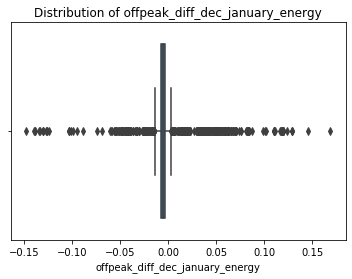

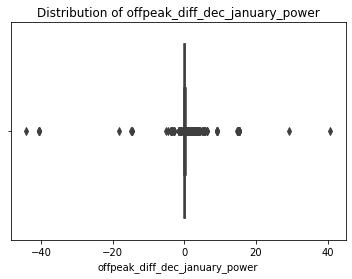

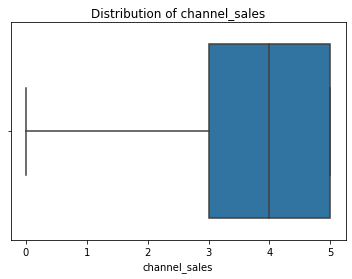

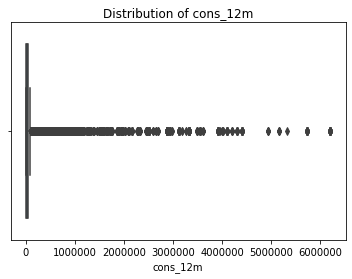

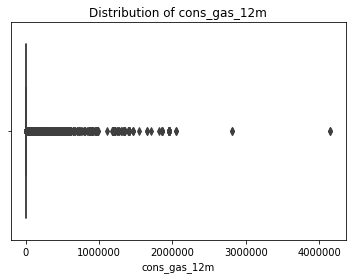

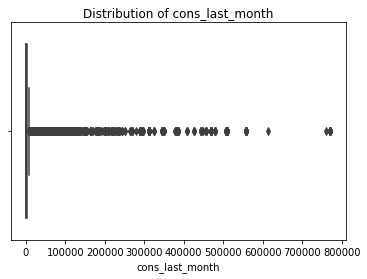

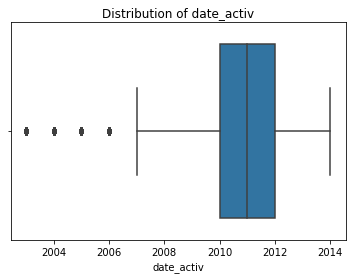

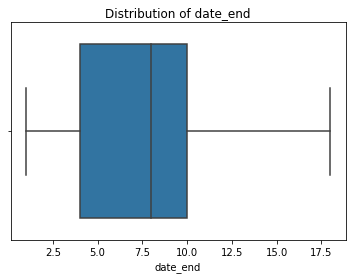

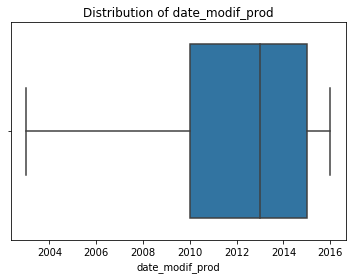

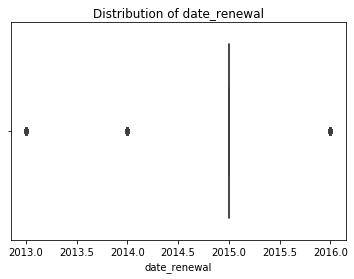

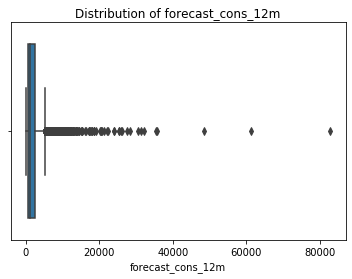

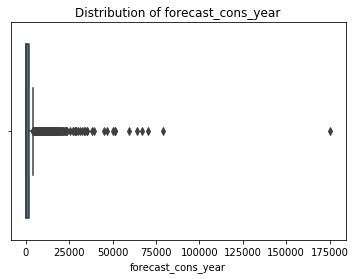

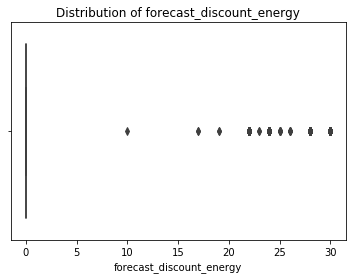

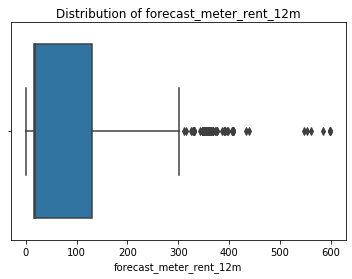

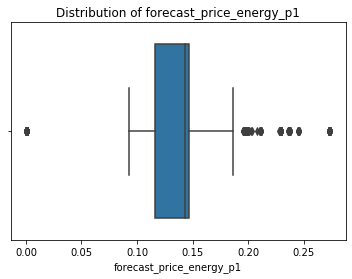

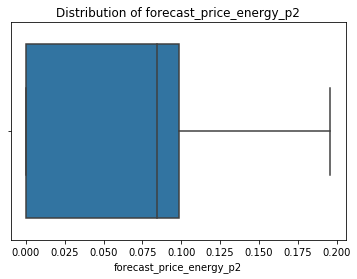

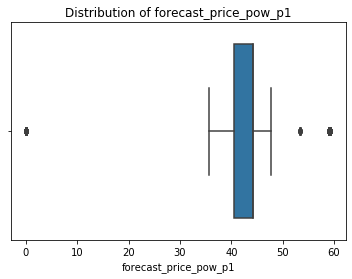

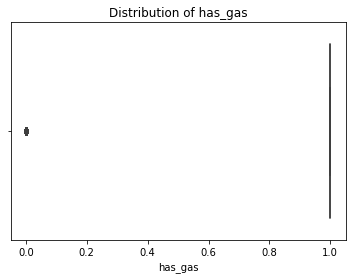

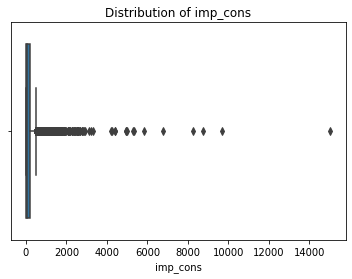

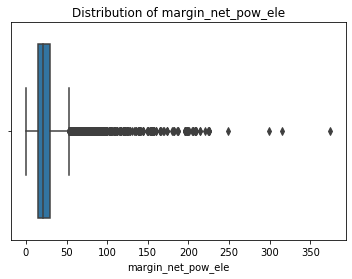

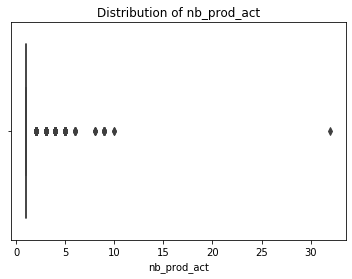

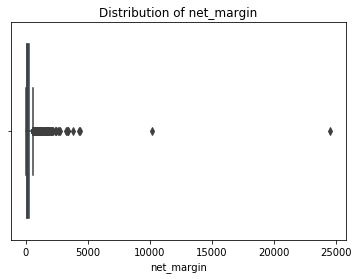

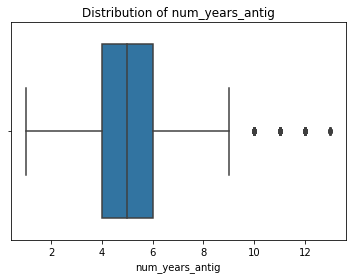

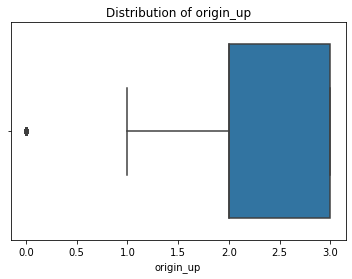

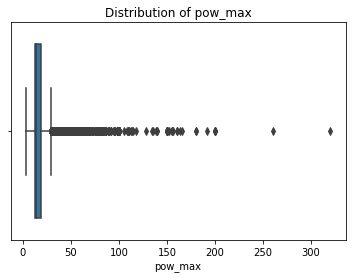

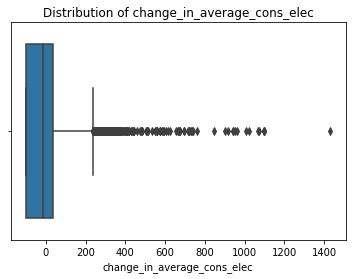

In [42]:
boxplot_outliers(df)

In [43]:
##Removing outliers in team engineered feature

In [44]:
def outlier_remover(df,feature):
    df  = df.copy()
    Q1 = np.percentile(df[feature], 25,
                   interpolation = 'midpoint')
    Q3 = np.percentile(df[feature], 75,
                   interpolation = 'midpoint')
    IQR = Q3 - Q1
    upper = np.where(df[feature] >= (Q3+1.5*IQR))
    lower  = np.where(df[feature] <= (Q1-1.5*IQR))
    df.drop(upper[0],inplace = True)
    df.drop(lower[0],inplace = True)
    return df

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, roc_auc_score,confusion_matrix,recall_score, f1_score

In [46]:
def split_train(df, target):
    X_train,X_test, y_train,y_test = train_test_split(df,target,test_size=0.3,random_state=0,stratify=target)
    return X_train, X_test, y_train, y_test

In [47]:
X_train,X_test, y_train, y_test = split_train(df, target)

In [48]:
X_train.head(4)

,offpeak_diff_dec_january_energy,offpeak_diff_dec_january_power,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,...,forecast_price_pow_p1,has_gas,imp_cons,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,change_in_average_cons_elec
12456,-0.007794,0.162916,5,163565,0,13927,2012,6,2012,2015,...,40.606701,1,408.73,66.88,1,519.92,4,3,73.000,2.175893
735,-0.003423,0.177779,5,13951,0,1764,2010,5,2010,2015,...,44.311378,1,258.93,18.99,1,178.29,6,3,11.420,51.731059
11050,-0.008497,0.162916,5,66314,0,5693,2012,8,2012,2015,...,40.606701,1,548.17,13.02,1,683.44,3,0,34.641,3.018970
5677,0.054163,1.677779,5,11290,4176,1468,2013,5,2015,2015,...,45.806878,0,295.48,31.41,4,135.35,3,3,12.100,56.031887


In [49]:
class RandomForestModel:
    
    intialization= RandomForestClassifier(random_state=42,n_estimators=500)
    
    def __init__(self, X_train,X_test,y_train,y_test,forest=None,prediction=None):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.forest  = forest
        self.prediction = prediction
    
    def train(self):
        self.forest = self.intialization.fit(self.X_train, self.y_train)
        self.prediction = self.forest.predict(X_test)
    
#     def precision(self):
#         print('The precision is',precision_score(y_test, self.prediction))
    def recall(self):
        print('The recall is',recall_score(y_test, self.prediction))
    def f1(self):
        print('The F1 score is',f1_score(y_test, self.prediction))
    def auc_score(self):
        print('The ROC_AUC score is',roc_auc_score(y_test,self.prediction))
    
    def show_confusionMatrix(self):
        matrix = confusion_matrix(y_test,self.prediction)
        ax = sns.heatmap(matrix, annot=True, cmap='Blues')

        ax.set_title('Seaborn Confusion Matrix with labels\n\n');
        ax.set_xlabel('\nPredicted Values')
        ax.set_ylabel('Actual Values ');

        ## Ticket labels - List must be in alphabetical order
        ax.xaxis.set_ticklabels(['False','True'])
        ax.yaxis.set_ticklabels(['False','True'])

        ## Display the visualization of the Confusion Matrix.
        plt.show()
    
    def most_used_features(self):
        feature_importance_df = pd.DataFrame(self.intialization.feature_importances_,columns=['importance'])
        feature_importance_df['feature'] = self.X_train.columns
        
        plt.figure(figsize=(20, 12));
        sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50))
        plt.title('Model features importance (top 50):'); 

In [50]:
pred_forest = RandomForestModel(X_train,X_test,y_train,y_test)

In [51]:
pred_forest.train()

In [52]:
pred_forest.recall()

The recall is 0.04929577464788732


In [53]:
pred_forest.auc_score()

The ROC_AUC score is 0.5245214970307182


In [54]:
pred_forest.f1()

The F1 score is 0.09375


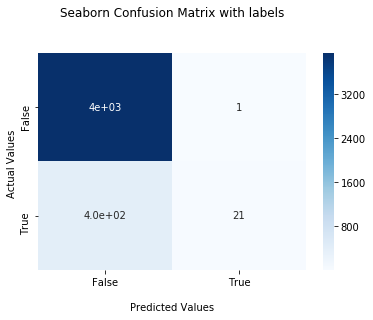

In [55]:
pred_forest.show_confusionMatrix()

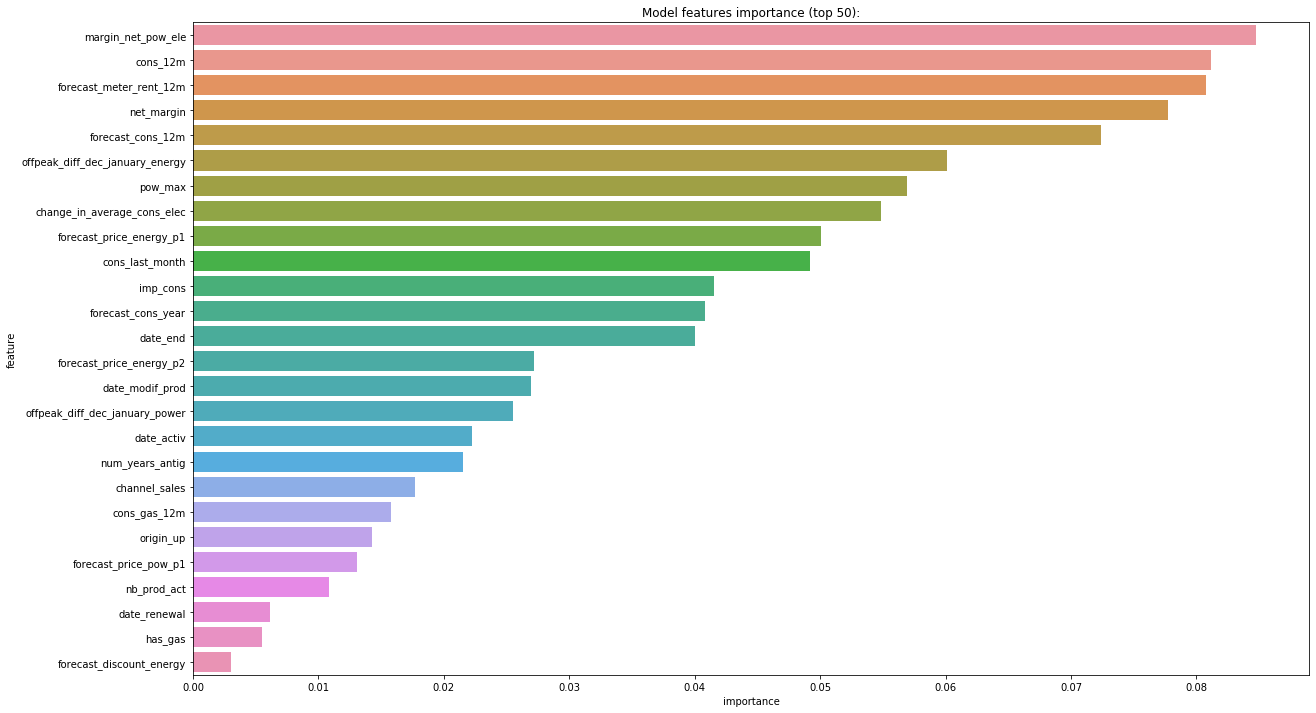

In [56]:
pred_forest.most_used_features()

**Feature engineering summary:**

    Most feature engineering was making the data ready for the model, converting datetime to either months or years, converting the categorical variables to the numbers. For the categorical variables ‘origin_up’ and ‘channel_sales’ a new value created called ‘Rare’, the ‘Rare’ value is used to group all the values that made less than 1% of the feature.
    A new feature called 'change_in_average_cons_elec' which takes into account the change in 'cons_last_month' and the average monthly cons_elec in 'cons_12m'.
    Some other feature engineering was removing the outliers present in the numerical features created.

**Model Performance:**

	The model performed terribly, it appears the features created were not able to predict the customer churn effectively. The model built was a RandomForestClassifier. 
 The pros include:

     It can handle non-linear and linear relationships
    The distribution of the features doesn’t affect the model’s performance
The cons include:

    Model interpretability is almost impossible, this models are most treated as black boxes

**Evaluation Summary:**

    For evaluation metrics the best  option was to go with Recall/Sensitivity. The reason is we are more concerned with the Type II error than Type I, that is we are more concerned with the number of churned customers correctly predicted.
    
    The model also shows the three main driver of churn are 'margin_net_pow_ele':net margin on power subscription, 'cons_12m':electricity consumption of the past 12 months, and 'forecast_cons_12m':forecasted electricity consumption for next 12 months